# Classification

*Classification* is a supervised machine learning method where the model attempts to correctly attribute a *label* to a given input data. It learns by looking at examples with labels, and attempting to understand the relation between the label and the *features*, which are the independent variables.

## Table of Contents

* [Logistic Regression](#logistic-regression)
* [Decision Tree](#decision-tree)
* [Random Forest](#random-forest)
* [Support Vector Machine (SVM)](#support-vector-machine)
* [Naive-Bayes](#naive-bayes)
* [K-Nearest Neighbouts (KNN)](#k-nearest-neighbours)

## Logistic Regression <a id="logistic-regression"></a>

Despite being named *Logistic Regression*, this algorithm is used in the classification task, and is the first model that will be tackled in this chapter. To explain what the Logistic Regression is, it makes sense to define the *Logistic Function*. This function takes as input any real number, for example *t*, and outputs a value between 0 and 1. The inputs of this function are regularly called *logits* and the output corresponds to the probability. The standard logistic regression is then defined as:

$$ \sigma (t) = \frac{e^{t}}{e^{t} + 1} = \frac{1}{1 + e^{-t}}$$

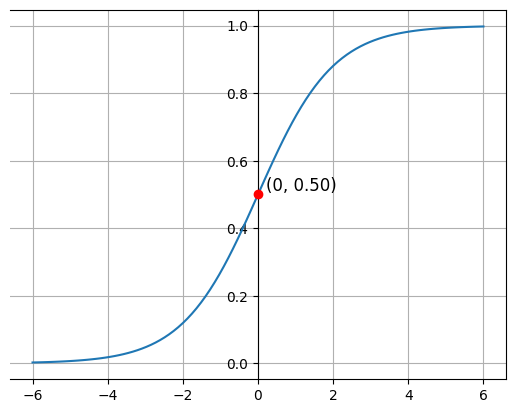

In [16]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-6, 6, 100)
sigma = 1 / (1 + np.exp(-t))

y_intercept = 1 / (1 + np.exp(0))

plt.plot(t, sigma)
plt.scatter(0, y_intercept, color="red", zorder=3)
plt.text(0.2, y_intercept, f"(0, {y_intercept:.2f})", fontsize=12, color="black", verticalalignment="bottom")
plt.grid(True)
ax = plt.gca()
ax.spines["left"].set_position("center")
plt.show()

As shown in the code above, this function intercepts the $y$ axis at 0.50. $t$ can be defined by a function, for example, $t = \theta_{0} + \theta_{1}x$, allowing us to rewrite the logistic equation as:

$$ p(x) = \sigma (t) = \frac{1}{1 + e^{-(\theta_{0} + \theta_{1}x)}} $$

In this context, $p(x)$ corresponds to the probability that an independent variable $y$ belongs to the label one (see label one as the opposite of the label zero, like true and false, respectively) and this equation will be further explained below. However, $t$ does not need to be characterized by two parameters and can be described by a $n$ number of features, so that:

$$
X =
\begin{bmatrix}
    x_{11} & \dots  &  x_{1m} \\
    x_{21} & \dots  &  x_{2m} \\
    \vdots & \ddots & \vdots  \\
    x_{n1} & \dots  &  x_{nm} \\
\end{bmatrix}
$$

Therefore, $Y$ can also be described as:

$$ 
Y =
\left\{
    \begin {aligned}
         & 0 \quad \text{if Class 0}  \\
         & 1 \quad \text{if Class 1}  \\
    \end{aligned}
\right.
$$

The function $t$ can now be rewritten as:

$$
t = \sum_{i=1}^{n} w_{i}x_{i} + b
$$

when $w = [w_{1}, w_{2}, ..., w_{n}]$ is the array that contains the weights of the coefficients and $b$ is the bias of the equation. One can go further and rewrite X as the following, where $w_{0} = b$:
$$
    X =
    \begin{bmatrix}
           1   &    1   &    1    \\
        x_{11} & \dots  &  x_{1m} \\
        x_{21} & \dots  &  x_{2m} \\
        \vdots & \ddots & \vdots  \\
        x_{n1} & \dots  &  x_{nm} \\
    \end{bmatrix} \text{and }
    w = [w_{0}, w_{1}, w_{2}, ..., w_{n}]
$$
Simplifying $t$ to:
$$
    t = w \cdot X
$$

Lastly, consider $P(y=1) = \sigma(t)$ and $P(y=0) = 1 - \sigma(t)$.

Logits is the inverse of the logistic equation expression so that:

$$ \text{logit}p = \sigma^{-1}(p) $$

To find what $\sigma^{-1}(p)$, we must solve the following for $x$:

$$ 
\sigma(x) = p \\
\Leftrightarrow p = \frac{1}{1+e^{-x}} \\
\Leftrightarrow p + pe^{-x} = 1 \\
\Leftrightarrow pe^{-x} = 1 - p \\
\Leftrightarrow e^{-x} = \frac{1 - p}{p} \\
\Leftrightarrow e^{x} = \frac{p}{1 - p} \\
\Leftrightarrow x = ln\left(\frac{p}{1 - p}\right) \\
$$

Then:
$$ \text{logit}p = \sigma^{-1}(p) = ln\left(\frac{p}{1 - p}\right) = t(x) $$

From which we can elaborate:

$$
ln\left(\frac{p}{1 - p}\right) = wX \\
\Leftrightarrow \frac{p}{1 - p} = e^{wX} \\
\Leftrightarrow p = e^{wX}(1 - p) \\
\Leftrightarrow p + pe^{wX} = e^{wX} \\
\Leftrightarrow p (1 + e^{wX}) = e^{wX} \\
\Leftrightarrow p = \frac{e^{wX}}{1 + e^{wX}} \\
\Leftrightarrow p = \frac{1}{1 + e^{-wX}} \\
\Leftrightarrow p(w, X) = \frac{1}{1 + e^{-wX}} \\
$$

The usual measure of a good fit in logistic regression is the logistic loss, also known as the negative log-likelihood. As written above, for a given value $x_{i}$ and $y_{i}$, $p_{i} = p(x_{i})$ corresponds to the probability that the values $x_{i}$ correspond to $y_{i} = 1$. On the contrary, the probability that the same values of $x_{i}$ correspond to $y_{i} = 0$ is $1 - p(x_{i})$. The log loss can be described, for a point $i$, as:

$$
\ell_{i} = 
\left\{
    \begin{aligned}
         & -\text{ln}(p_{i})     \quad & \text{if $y_{1} = 1$}  \\
         & -\text{ln}(1 - p_{i}) \quad & \text{if $y_{1} = 0$}  \\
    \end{aligned}
\right.
$$

One common way to interpret the log loss is as the surprise of the outcome $y_{i}$ for the predicted probability $p_{i}$. Log loss varies from 0 to infinity: it is zero when a perfect prediction is made ($p_{i} - y_{k} = 0$) and tends to infinity in the opposite case ($p_{i} - y_{k} = \pm 1$). The log loss can be combined in one single expression as presented below:

$$
\ell_{i} = -y_{i}\text{ln}(p_{i}) - (1 - y_{i})\text{ln}(1 - p_{i})
$$

The sum of the log loss for for every $i$ value is the overall negative log-likelihood $-\ell$ and the best fit for $w$ is when $-\ell$ is minimized. Alternatively, instead of minimizing the loss, one can maximize its inverse, the log-likelihood:

$$
\ell_{i} = \sum_{i:y_{i}=1} \text{ln}(p_{i}) + \sum_{i:y_{i}=0} \text{ln}(1 - p_{i}) = \sum_{i=1} y_{i}\text{ln}(p_{i}) + (1 - y_{i})\text{ln}(1 - p_{i})
$$

Similarly, it is possible to maximize the likelihood function itself, which corresponds to the probability of the outcome given a set of data, $L$:
$$
L = e^{\sum_{i=1} y_{i}\text{ln}(p_{i}) + (1 - y_{i})\text{ln}(1 - p_{i})} =\\
= \Pi_{i=1}^{n} e^{y_{i}\text{ln}(p_{i})} \cdot e^{(1 - y_{i})\text{ln}(p_{i})} =\\
= \Pi_{i=1}^{n} p_{i}^{y_{i}} \cdot (1 - p_{i})^{1 - y_{i}} \\

\therefore \\

L = \Pi_{i:y_{i}=1}(p_{i}) \Pi_{i:y_{i}=0}(1 - p_{i})
$$

This method is also known as maximum likelihood estimation. 

Unlike Linear Regression, Logistic Regression does not have a closed-form equation that allows us to obtain the best set of $\theta$ values. Fortunately, log-loss is a convex function, which means that with a low enough learning rate and patience, it is guaranteed to reach the global minimum, using Gradient Descent or any other optimization algorithm. Now, let's derive the log-loss to get a grasp of what is necessary to attain the optimal set of $\theta$, including the division by the total number of data points:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1} \left[ y_{i}\text{ln}(p_{i}) + (1 - y_{i})\text{ln}(1 - p_{i}) \right]\\
\Leftrightarrow J(\theta) = \sum_{i=1} \left[ y_{i}\text{ln}(\sigma (\theta^{T} \text{x}^{(i)})) + (1 - y_{i})\text{ln}(1 - \sigma (\theta^{T} \text{x}^{(i)})) \right]\\
$$

Deriving, we get:

$$
\frac{\partial}{\partial \theta_{j}} J(\theta) =  - \frac{1}{m} \sum^{m}_{i=1} \left( \frac{\partial}{\partial \theta_{j}} y^{(i)}(\text{ln}(\sigma(\theta^{T}\text{x}))) \right) \left( \frac{\partial}{\partial \theta_{j}} (1 - y^{(i)})(\text{ln}(1 - \sigma(\theta^{T}\text{x}))) \right)\\
$$

Let's begin by calculating the derivative of the left part:

$$
\frac{\partial}{\partial \theta_{j}} \left( y^{(i)}(\text{ln}(\sigma(\theta^{T}\text{x}))) \right) =\\
= \frac{\partial}{\partial \theta_{j}} \left( y^{(i)}\text{ln}\left(\frac{e^{\theta^{T}\text{x}}}{e^{\theta^{T}\text{x}} + 1} \right) \right) =\\
= \frac{\partial}{\partial \theta_{j}} \left( -y^{(i)}\text{ln}\left(\frac{e^{\theta^{T}\text{x}} + 1}{e^{\theta^{T}\text{x}}} \right) \right) =\\
= \frac{\partial}{\partial \theta_{j}} \left( -y^{(i)}\text{ln}\left(1 + e^{-\theta^{T}\text{x}} \right) \right) =\\
= - \frac{1}{e^{-\theta^{T}\text{x}} + 1} \times \frac{\partial}{\partial \theta_{j}} (e^{-\theta^{T}\text{x}} + 1)=\\
= x_{j}^{(i)} \frac{e^{-\theta^{T}\text{x}}}{e^{-\theta^{T}\text{x}} + 1}=\\
= x_{j}^{(i)} \sigma (-\theta^{T} \text{x})=\\
= x_{j}^{(i)} \frac{1}{1 + e^{\theta^{T}\text{x}}}=\\
= x_{j}^{(i)} \frac{e^{\theta^{T}\text{x}} - e^{\theta^{T}\text{x}} + 1}{1 + e^{\theta^{T}\text{x}}}=\\
= x_{j}^{(i)} \frac{e^{\theta^{T}\text{x}} + 1}{e^{\theta^{T}\text{x}} + 1} - \frac{e^{\theta^{T}\text{x}}}{e^{\theta^{T}\text{x}} + 1}=\\
= x_{j}^{(i)} \left(1 - \frac{e^{\theta^{T}\text{x}}}{e^{\theta^{T}\text{x}} + 1} \right)=\\
= x_{j}^{(i)} \left(1 - \sigma (\theta^{T}\text{x}) \right)
$$

Now the derivative of the right part:
$$
\frac{\partial}{\partial \theta_{j}} \text{ln}(1 - \sigma(\theta^{T}\text{x})) =\\
= \frac{\partial}{\partial \theta_{j}} \text{ln}(1 - \frac{e^{\theta^{T}\text{x}}}{e^{\theta^{T}\text{x}} + 1}) =\\
= \frac{\partial}{\partial \theta_{j}} \text{ln}\left(1 - \frac{1}{e^{-\theta^{T}\text{x}} + 1}\right) =\\
= \frac{\partial}{\partial \theta_{j}} \text{ln}\left(\frac{1 - 1 + e^{-\theta^{T}\text{x}}}{e^{-\theta^{T}\text{x}} + 1}\right) =\\
= \frac{\partial}{\partial \theta_{j}} \text{ln}\left(\frac{e^{-\theta^{T}\text{x}}}{e^{-\theta^{T}\text{x}} + 1}\right) =\\
= - \frac{\partial}{\partial \theta_{j}} \text{ln}\left(\frac{1}{e^{-\theta^{T}\text{x}}} + 1\right) =\\
= - \frac{\partial}{\partial \theta_{j}} \text{ln}\left(e^{\theta^{T}\text{x}} + 1\right) =\\
= - \left[\frac{1}{e^{\theta^{T}\text{x}} + 1} \times \frac{\partial}{\partial \theta_{j}} (e^{\theta^{T}\text{x}} + 1) \right]=\\
= - \left[\frac{1}{e^{\theta^{T}\text{x}} + 1} \times x_{j}^{(i)} e^{\theta^{T}\text{x}} \right]=\\
= - \frac{x_{j}^{(i)} e^{\theta^{T}\text{x}}}{e^{\theta^{T}\text{x}} + 1}=\\
= - x_{j}^{(i)}\sigma{(\theta^{T}\text{x})}
$$

Now plugging in both parts in the equation, we get:

$$
\frac{\partial}{\partial \theta_{j}} J(\theta) =  - \frac{1}{m} \sum^{m}_{i=1} \left[ \left( x_{j}^{(i)} \left(1 - \sigma (\theta^{T}\text{x}) \right) \right) \left(- x_{j}^{(i)}\sigma{(\theta^{T}\text{x})} \right) \right]\\
\Leftrightarrow \frac{\partial}{\partial \theta_{j}} J(\theta) =  - \frac{1}{m} \sum^{m}_{i=1} \left[ y^{(i)} x^{(i)}_{j} - y^{(i)} x^{(i)}_{j} \sigma (\theta^{T}\text{x}) - x_{j}^{(i)} \sigma(\theta^{T}\text{x}) + y^{(i)} x^{(i)}_{j} \sigma (\theta^{T}\text{x}) \right]\\
\Leftrightarrow \frac{\partial}{\partial \theta_{j}} J(\theta) = - \frac{1}{m} \sum^{m}_{i=1} \left[ y^{(i)} x^{(i)}_{j} - x_{j}^{(i)} \sigma(\theta^{T}\text{x}) \right]\\
\Leftrightarrow \frac{\partial}{\partial \theta_{j}} J(\theta) = \frac{1}{m} \sum^{m}_{i=1} \left[ x^{(i)}_{j} (\sigma(\theta^{T}\text{x}) - y^{(i)}) \right]\\
$$

Therefore, the partial derivative of the log-loss function with respect to $\theta$ for a feature $\theta_{j}$ is given by the expression above.

To test the use of Logistic Regression in the classification, we shall use the famous Iris Dataset, that contains only four features (the sepal and pethal length and width) of iris flowers from three different species (Iris-Setosa, Iris-Versicolor, and Iris-Virginica). In this case, we will only consider the petal width as feature and two possible classes: is a Iris-Virginica plant or is not a Iris-Virginica plant.


In [1]:
from sklearn import datasets
iris = datasets.load_iris() 
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

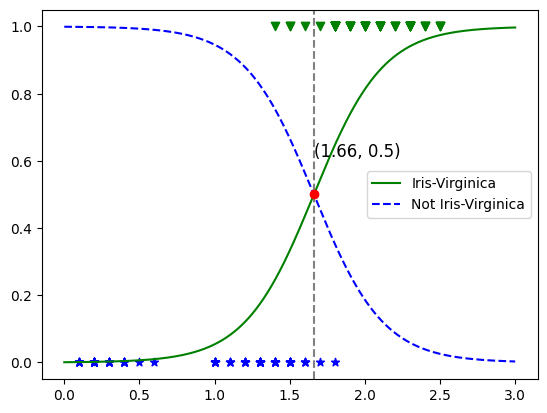

In [38]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X = iris["data"][:, 3:] # Gets the petal width data
y = (iris["target"] == 2).astype(int) # Sets the target as 1 for Iris-Virginica and 0 for any other plants

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

X_zero = X[y==0]
y_zero = y[y==0]
X_one = X[y==1]
y_one = y[y==1]

interception = X_new[y_proba[:, 1] > y_proba[:, 0]][0][0]

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.axvline(interception, ls="--", c="gray")
plt.scatter(interception, 0.5, color="red", zorder=3)
plt.text(interception, 0.6, f"({interception:.2f}, 0.5)", fontsize=12, color="black", verticalalignment="bottom")
plt.scatter(X_zero, y_zero, marker="*", color="blue")
plt.scatter(X_one, y_one, marker="v", color="green")
plt.legend()
plt.show()


In this plot, we tried to represent the curves of probabilities of a petal length belonging to a class. In this case, the threshold length after which the plant is considered Iris-Virginica is 1.66 cm. It is seen in the plot, that some instances of Iris-Virginica have a petal length smaller than that while plants of other species have a petal length above it. In this regeion, the model is unsure of which class the data belongs to, with a confidence around near 50%.

Theta_0 (intercept): -45.27248307004622
Theta_1: 5.754520527378289
Theta_2: 10.44681115801927


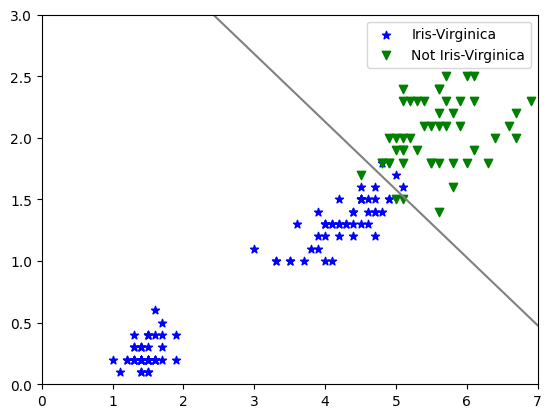

In [89]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X = iris["data"][:, 2:]

X_0 = iris["data"][:, 2] # Gets the petal length and width data
X_1 = iris["data"][:, 3] # Gets the petal length and width data
y = (iris["target"] == 2).astype(int) # Sets the target as 1 for Iris-Virginica and 0 for any other plants

log_reg = LogisticRegression(penalty=None)
log_reg.fit(X, y)

theta_0 = log_reg.intercept_[0]
theta_1, theta_2 = log_reg.coef_[0]

# 0 = theta_0 + theta_1 * X_1 + theta_2 * X_2
# - theta_0 + theta_1 * X_1 / theta_2 = X_2

X1_display = np.linspace(0, 7, 1000).reshape(-1, 1)
X2_display = - (theta_0 + theta_1 * X1_display) / theta_2

X_zero = X[y==0]
y_zero = y[y==0]
X_one = X[y==1]
y_one = y[y==1]

print("Theta_0 (intercept): " + str(theta_0))
print("Theta_1: " + str(theta_1))
print("Theta_2: " + str(theta_2))

plt.axis([0,7, 0,3])
plt.plot(X1_display, X2_display, c="gray")
plt.scatter(X_zero[:,0], X_zero[:,1], marker="*", c="blue", label="Iris-Virginica")
plt.scatter(X_one[:,0], X_one[:,1], marker="v", c="green", label="Not Iris-Virginica")
plt.legend()
plt.show()

We have seen above the boundary predicted by the model when two features are considered. Let's compare it with a solution done without using Scikit-learn:

In [96]:
import numpy as np

epochs = 100000
learning_rate = 0.01
X = iris["data"][:, 2:]
m = X.shape[1]

X_0 = np.ones(X.shape[0]).reshape(-1, 1)
X_1 = iris["data"][:, 2].reshape(-1, 1) # Gets the petal length and width data
X_2 = iris["data"][:, 3].reshape(-1, 1) # Gets the petal length and width data
X = np.concatenate((X_0, X_1, X_2), axis=-1)
y = (iris["target"] == 2).astype(int) # Sets the target as 1 for Iris-Virginica and 0 for any other plants

theta = np.zeros(X.shape[1])

for epoch in range(epochs):
    y_pred = 1 / (1 + np.exp(- X @ theta))

    d_theta = (1 / m) * (X.T @ (y_pred - y))

    theta = theta - learning_rate * d_theta

print("Theta_0 (intercept): " + str(theta[0]))
print("Theta_1: " + str(theta[1]))
print("Theta_2: " + str(theta[2]))

Theta_0 (intercept): -44.25822714364792
Theta_1: 5.602677315842569
Theta_2: 10.282067154514849


As we see, with enough epochs and a small enough learning rate, the result converged to the same solution as when using the Sklearn function!

## Decision Tree <a id="decision-tree"></a>

## Random Forest <a id="random-forest"></a>

## Support Vector Machine (SVM) <a id="support-vector-machine"></a>

## Naive-Bayes <a id="naive-bayes"></a>

## K-Nearest Neighbours (KNN) <a id="k-nearest-neighbours"></a>